In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../uscode')

import itertools
import functools
import random
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import util
from uscode import USCode
from citation_network import CitationNetwork
from cluster import *

In [4]:
usc = USCode.from_json('../data/usc20191009.json')
titles = list(usc.iter_titles())
print(len(titles))

cn = CitationNetwork(usc)
print(len(cn.nodes))

53
64165


In [5]:
with open('../data/title_sinks.json') as f:
    title_sinks = json.load(f)
    
for title in title_sinks:
    title_sinks[title] = set(title_sinks[title])

In [6]:
def sink_distance(t1, t2):
    n_inter = len(title_sinks[t1.id] & title_sinks[t2.id])
    n_union = len(title_sinks[t1.id] | title_sinks[t2.id])
    return iou_distance(n_inter, n_union)

In [7]:
clusterings = {}
clusterings['vec'] = Clustering(titles, vectorization_distance)
clusterings['cite'] = Clustering(titles, citation_distance)
clusterings['uw-cite'] = Clustering(titles, unweighted_citation_distance)
clusterings['sink'] = Clustering(titles, sink_distance)

In [11]:
def analyze(clustering):
    plt.figure(figsize=(20, 10))
    clustering.plot_dendrogram()
    plt.xticks(fontsize=14)

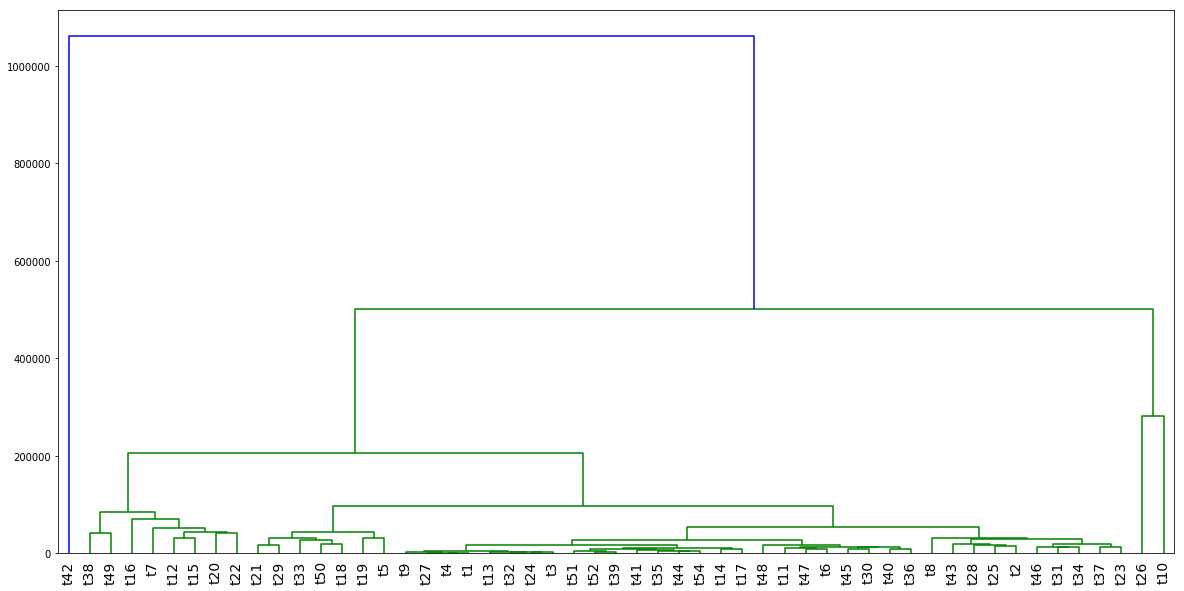

In [12]:
analyze(clusterings['vec'])

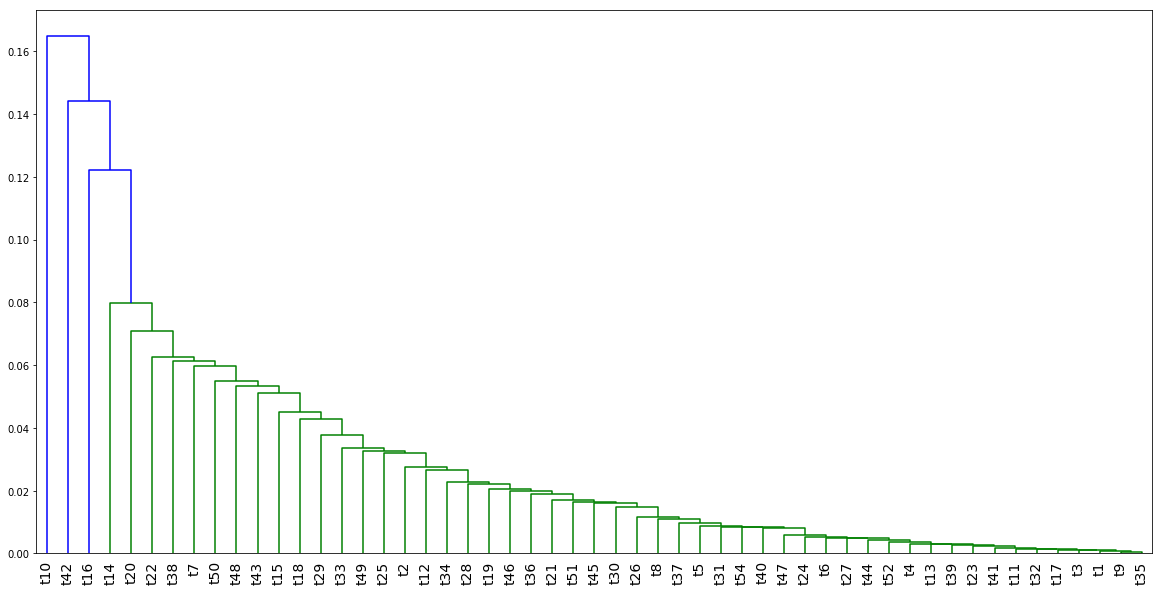

In [13]:
analyze(clusterings['sink'])

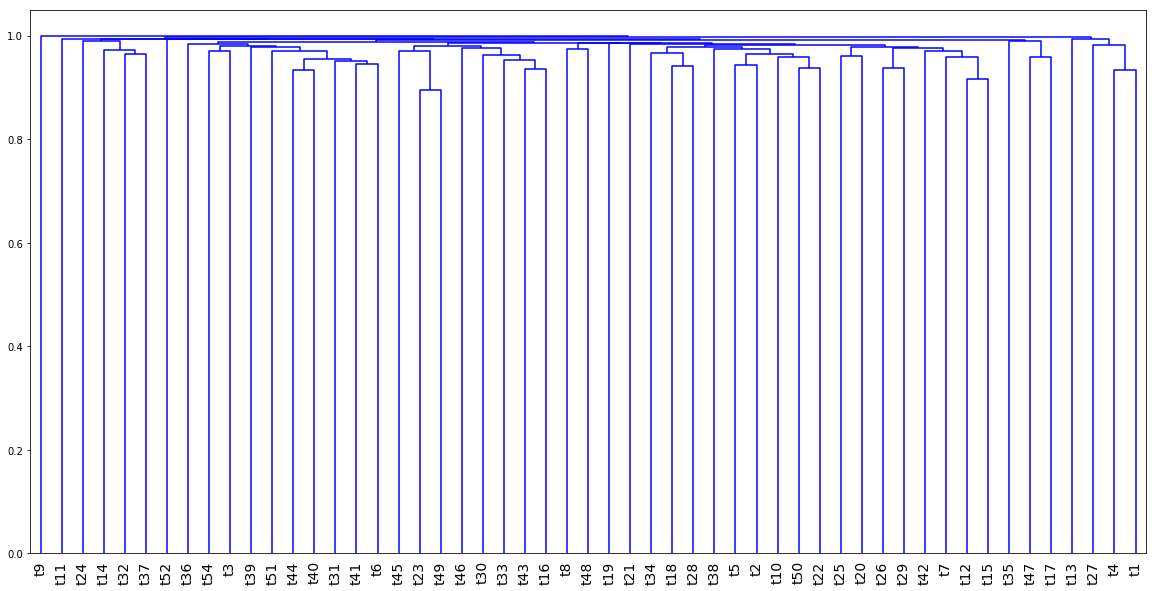

In [14]:
analyze(clusterings['cite'])

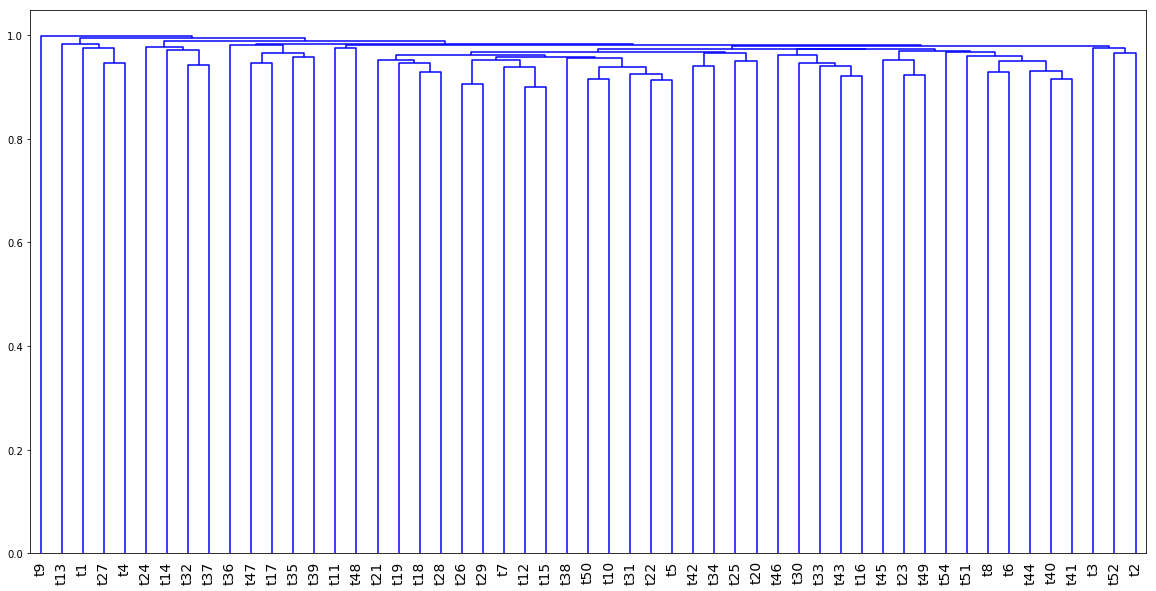

In [15]:
analyze(clusterings['uw-cite'])

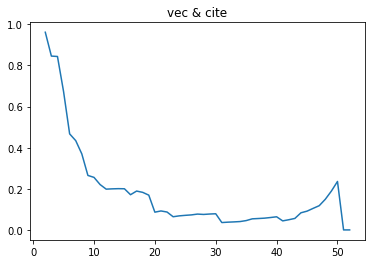

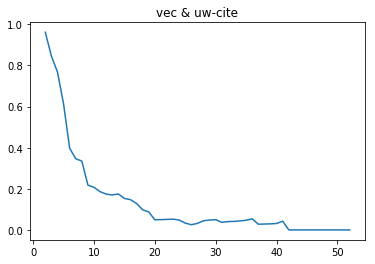

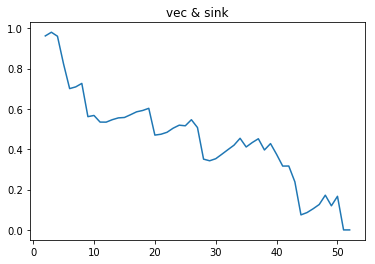

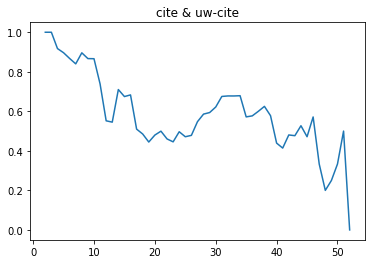

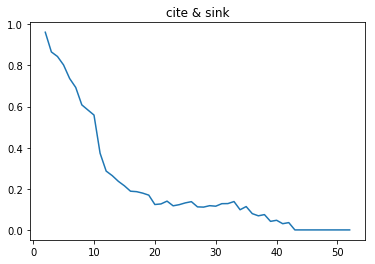

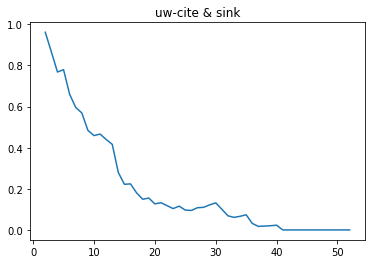

In [16]:
for a, b in itertools.combinations(clusterings.items(), 2):
    y = fm_index(a[1], b[1])
    
    plt.figure()
    plt.plot(range(2, a[1].n_samples), y)
    plt.title("{} & {}".format(a[0], b[0]))